In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 18 20:20:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<b><font size="7">Task 1</font></b>

<b>Understanding balance of class, data type and size of dataframe (Pre-processing stage)</b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data
original_db = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/diabetes_data_upload.csv')

#Look at numbers column name and types 
print(original_db.dtypes)

#Look at it in df format
original_db.head(3)

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


In [ ]:
#Find out some background of data
#Look at size of data
print('Shape of data:',original_db.shape)

#Balance of Gender in our dataset
print('\nGender:')
print(original_db.Gender.value_counts())

#Range of age
print('\nAge:\nMin age =',original_db.Age.min(axis=0))
print('Max age =',original_db.Age.max(axis=0))

#Balance between 2 classes
print('\nClass:')
print(original_db['class'].value_counts())

Shape of data: (520, 17)

Gender:
Male      328
Female    192
Name: Gender, dtype: int64

Age:
Min age = 16
Max age = 90

Class:
Positive    320
Negative    200
Name: class, dtype: int64


<b>Checking for missing values (Pre-processing stage)</b>

In [ ]:
#Check if there is missing value in our dataset.
print(pd.isnull(original_db).sum()) #Check missing value of each column

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


There is no missing values at all in the dataset.

<b>Try to find if there are duplicated rows (Pre-processing stage)

In [ ]:
original_db[original_db.duplicated()]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


There are 269 similar rows but it is very difficult to judge if they are replication or indivual present with same symtoms hence we will keep them for this report.

<b>Apply One Hot Encoding on Gender for modelling (Pre-processing stage)</b>

In [ ]:
#Spliting Gender into Male & Female using One Hot Encoding method
Gender = pd.get_dummies(original_db['Gender'])
nominal_db = pd.concat([Gender,original_db.drop(columns='Gender')],axis=1)
nominal_db.head(3)

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,40,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,0,1,58,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,0,1,41,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


<b>Converting 'Yes/No' columns and 'Postive/Negative' class into numerical values for modelling (Pre-processing stage)</b>

In [ ]:
#Coverting columns with Yes & No values into Yes = 1 ; No = 0
nominal_db.replace('Yes',1,inplace=True)
nominal_db.replace('No',0,inplace=True)

#Coverting class to numeric, Postive = 1, Negative = 0
nominal_db.replace('Positive',1,inplace=True)
nominal_db.replace('Negative',0,inplace=True)

#Save modified nominal_db into a more simplier name
db = nominal_db
db.head(3)

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,1,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


<b>Distribution of Features using histogram and for Outliers detection in numeric attributes (Pre-processing stage)</b>

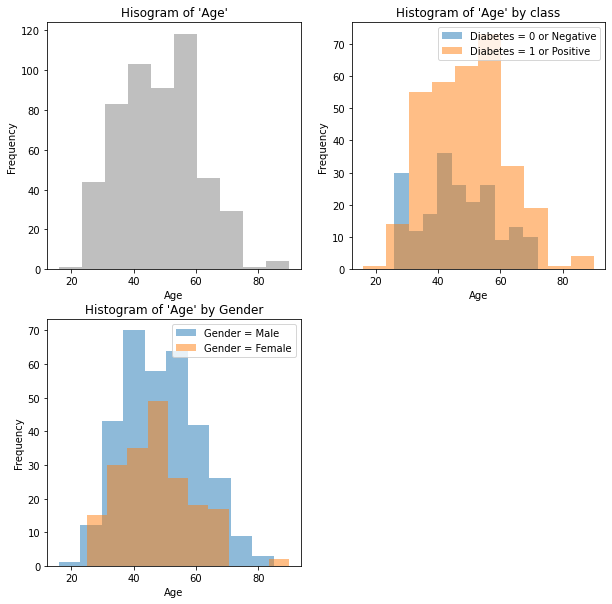

In [ ]:
#Self defined function to produce histogram
def plot_histogram(x):
    plt.hist(x, color='gray', alpha = 0.5)
    plt.title("Hisogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel('Age')
    plt.ylabel('Frequency')

#Self defined function to produce histogram and look at input category proportion
def plot_histogram_class(x,y):
    plt.hist(list(x[y==0]),alpha=0.5, label='Diabetes = 0 or Negative')
    plt.hist(list(x[y==1]),alpha=0.5, label='Diabetes = 1 or Positive')
    plt.title("Histogram of '{var_name}' by class".format(var_name=x.name))
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    
#Look at distribution of Age
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plot_histogram(db['Age'])
plt.subplot(2,2,2)
plot_histogram_class(db['Age'],db['class'])

plt.subplot(2,2,3)
plt.hist(list(original_db['Age'][original_db['Gender']=='Male']),alpha=0.5, label='Gender = Male')
plt.hist(list(original_db['Age'][original_db['Gender']=='Female']),alpha=0.5, label='Gender = Female')
plt.title("Histogram of '{var_name}' by Gender".format(var_name=db['Age'].name))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

Age is showing Guassian distribution in our dataset overall and for both Gender as shown in histogram number (0,0) and (1,0). When we label Age by class, the Guassian distribution maintained in our 'postive' and 'negative' indiviuals. 

Outlier is not detected in our continuous variable 'age' as displayed in the histograms.

<b>Correlation Matrix between attributes using heatmap</b>

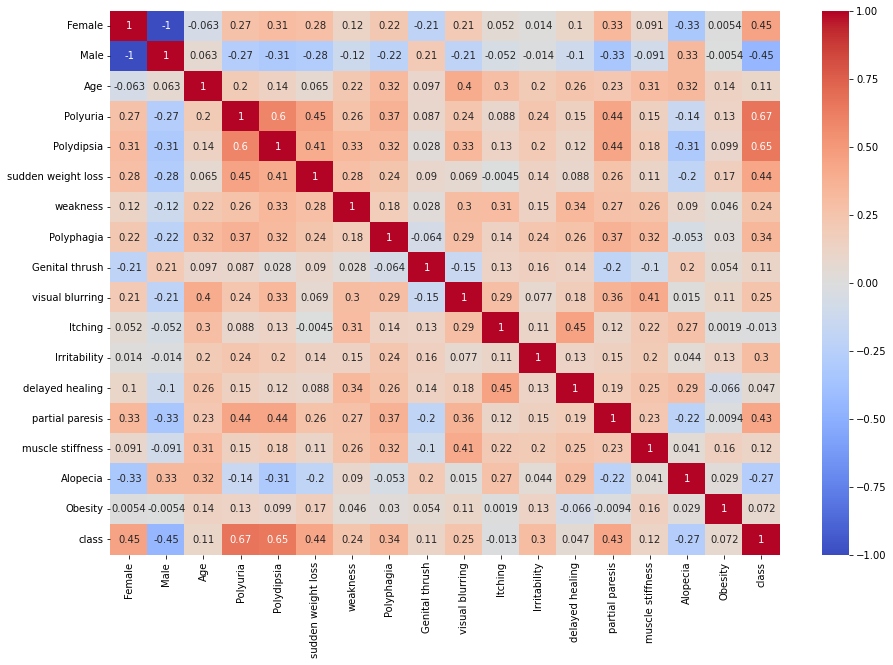

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(db.corr(),annot=True, cmap='coolwarm')

Based on the correlation matrix, we can see Polyuria and polydipsia are showing the strongest correlation. Followed by Male, Female, ssudden weight loss and  partial paresis. Female seems to be more likely getting diabetes as it is showing a positive correlation, whether as male is showing a negative correlation.

Noted that there is no point ploting pairplot or parrallel coordination plot as only 1 feature is not binanry i.e.Age.

In [ ]:
#Absolute values of correlation for each attribute to class
print(abs(db.corr()['class']))

Female                0.449233
Male                  0.449233
Age                   0.108679
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching               0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia              0.267512
Obesity               0.072173
class                 1.000000
Name: class, dtype: float64


<b>Feature Selection by correlation based on given Thresholds</b>

In [ ]:
#Function that takes dataset and print correlation with column 'class' of conditional threshold
def correlation_threshold(dataset,x):
    print('Features with correlation to \'class\' above threshold of:',x)
    print(abs(dataset.corr()['class'])[abs(dataset.corr()['class'])>x].drop('class').index.tolist(),'\n')
    
#Setting different correlation thresholds for selecting features
thresholds = [0.2,0.3,0.4,0.5,0.6,0.7]
for thresholds_val in thresholds:
    correlation_threshold(db,thresholds_val)

Features with correlation to 'class' above threshold of: 0.2
['Female', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis', 'Alopecia'] 

Features with correlation to 'class' above threshold of: 0.3
['Female', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia', 'partial paresis'] 

Features with correlation to 'class' above threshold of: 0.4
['Female', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'partial paresis'] 

Features with correlation to 'class' above threshold of: 0.5
['Polyuria', 'Polydipsia'] 

Features with correlation to 'class' above threshold of: 0.6
['Polyuria', 'Polydipsia'] 

Features with correlation to 'class' above threshold of: 0.7
[] 



<b>Normalising dataset using min-max normalisation in range [0,1] and droping ''Obesity'' and ''Itching'' due to low correlation (Pre-processing stage)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(db)

norm_db = pd.DataFrame(scaler.transform(db))

#Re-assign column names from original dataframe to normalised dataframe.
norm_db.columns = db.columns.values

#Setting normalised dataset as our core dataset
db = norm_db.drop(['Obesity','Itching'], axis =1)

db.head()

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,class
0,0.0,1.0,0.324324,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.567568,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.337838,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.391892,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.594595,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# #Dataseet we have now:

# #Normalised dataset
# db
# #Normalised Strong correlation features, >0.6 correation
# xstrong = db[['Polyuria', 'Polydipsia']]

# #Normalised Medium correlation features, >0.5 correation
# xmedium = db[['Female', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'partial paresis']]

# #Normalised Weak correlation features, >0.3 correation
# xweak = db[['Female', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia', 'partial paresis'] ]

#features for normalised dataset
x = db.drop(columns = 'class')

#y label applicatble for all datset above
y = db['class']

<b> 80:20 Training and Testing split 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3)

<b>Modelling with K-Nearest Neighbour (KNN)

Training Accurcy =  0.973
KNN result for K = 3:
[[58  2]
 [ 4 92]]
Testing Accuracy =  0.962
Recall =  0.958
Precision =  0.979
F1 Score =  0.968


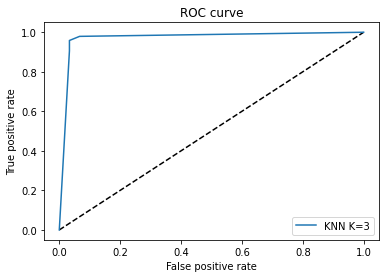

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_conf = knn.predict_proba(x_test)
y_train_pred = knn.predict(x_train)

print('Training Accurcy = ', metrics.accuracy_score(y_train,y_train_pred).round(3))
print('KNN result for K = 3:')
print(confusion_matrix(y_test, y_pred))
print('Testing Accuracy = ',metrics.accuracy_score(y_test,y_pred).round(3))
print('Recall = ',metrics.recall_score(y_test,y_pred).round(3))
print('Precision = ',metrics.precision_score(y_test,y_pred).round(3))
print('F1 Score = ',metrics.f1_score(y_test,y_pred).round(3))


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, np.argmax(y_conf,axis=1))

from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN K=3')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')


<b>Hyperparmeter tunning for KNN using mean error rate and GridSearchCV

Text(0, 0.5, 'Mean Error')

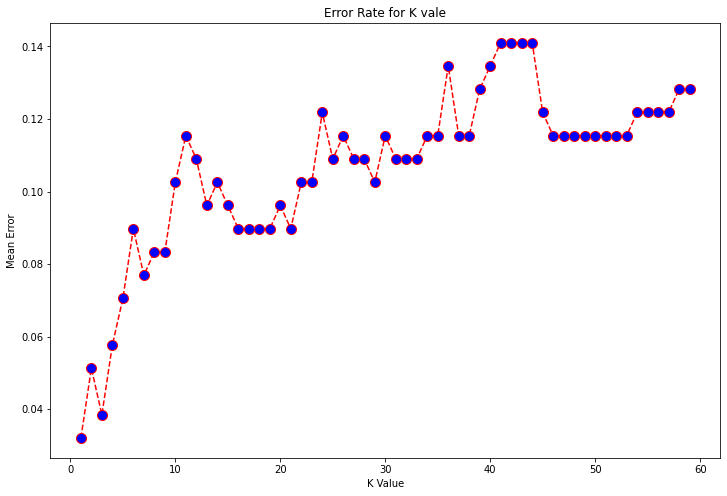

In [ ]:
error = []
for i in range(1,60,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 8))
plt.plot(range(1,60), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate for K vale')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


Applying best hyerparameter settings into our model

Training Accurcy =  1.0
Testing evalaution metrics
KNN result for K = 1:
[[58  2]
 [ 3 93]]
Testing Accuracy =  0.968
Recall =  0.969
Precision =  0.979
F1 Score =  0.974
AUC Score =  0.968


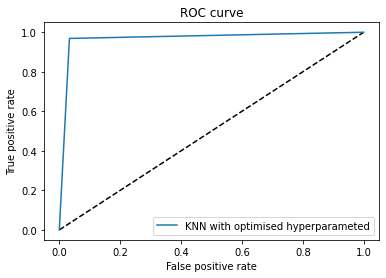

In [ ]:
#Re-split again to reset train and test values in the variable saved (More convenience than saving multiple names)
knn = KNeighborsClassifier(n_neighbors=1, leaf_size = 1, p =1)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_conf = knn.predict_proba(x_test)
knn_matrix = confusion_matrix(y_test, y_pred)
y_train_pred = knn.predict(x_train)

print('Training Accurcy = ', metrics.accuracy_score(y_train,y_train_pred).round(3))
print('Testing evalaution metrics')
print('KNN result for K = 1:')
print(knn_matrix)
print('Testing Accuracy = ',metrics.accuracy_score(y_test,y_pred).round(3))
print('Recall = ',metrics.recall_score(y_test,y_pred).round(3))
print('Precision = ',metrics.precision_score(y_test,y_pred).round(3))
print('F1 Score = ',metrics.f1_score(y_test,y_pred).round(3))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, np.argmax(y_conf,axis=1))
print('AUC Score = ',auc_score.round(3))

from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN with optimised hyperparameted')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

<b>Modelling with Logistic Regression (LR)</b>

Training Accurcy =  0.926
Testing evalaution metrics:
[[54  6]
 [10 86]]
Testing Accuracy =  0.897
Recall =  0.896
Precision =  0.935
F1 Score =  0.915
AUC Score =  0.898


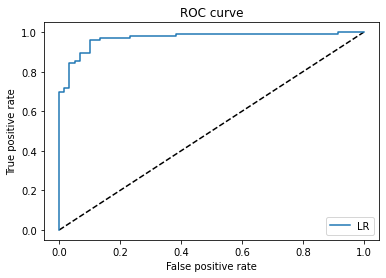

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

lr = LogisticRegression(solver='lbfgs', max_iter=8000)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_conf = lr.predict_proba(x_test)
y_train_pred = lr.predict(x_train)

print('Training Accurcy = ', metrics.accuracy_score(y_train,y_train_pred).round(3))
print('Testing evalaution metrics:')
print(confusion_matrix(y_test, y_pred))
print('Testing Accuracy = ',metrics.accuracy_score(y_test,y_pred).round(3))
print('Recall = ',metrics.recall_score(y_test,y_pred).round(3))
print('Precision = ',metrics.precision_score(y_test,y_pred).round(3))
print('F1 Score = ',metrics.f1_score(y_test,y_pred).round(3))


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
# print(fpr)
# print(tpr)
# print(thresholds)
auc_score = roc_auc_score(y_test, np.argmax(y_conf,axis=1))
print('AUC Score = ',auc_score.round(3))
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')


<b>Hyperparameters tunning for LR using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

logmodel = LogisticRegression()
#Hyperparameter to tune
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,1000,2500,5000] 
    }
]

#Fit GridSearchCV to find best settings
clf = GridSearchCV(logmodel, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(x,y) 

best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

LogisticRegression(C=1.623776739188721, solver='liblinear')

Hence, best hyperparmeter settings from Results of GridSearchCV = LogisticRegression(C=0.23357214690901212, solver='liblinear')

Training Accurcy =  0.926
Testing evalaution metrics:
[[54  6]
 [10 86]]
Testing Accuracy =  0.897
Recall =  0.896
Precision =  0.935
F1 Score =  0.915
AUC Score =  0.898


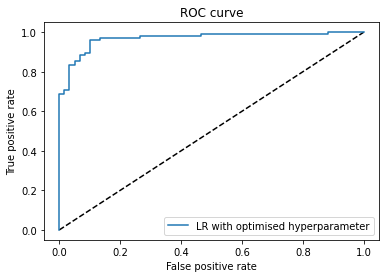

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

lr = LogisticRegression(solver='liblinear', C=1.623776739188721)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_conf = lr.predict_proba(x_test)
lr_maxtrix = confusion_matrix(y_test, y_pred)
y_train_pred = lr.predict(x_train)

print('Training Accurcy = ', metrics.accuracy_score(y_train,y_train_pred).round(3))
print('Testing evalaution metrics:')
print(lr_maxtrix)
print('Testing Accuracy = ',metrics.accuracy_score(y_test,y_pred).round(3))
print('Recall = ',metrics.recall_score(y_test,y_pred).round(3))
print('Precision = ',metrics.precision_score(y_test,y_pred).round(3))
print('F1 Score = ',metrics.f1_score(y_test,y_pred).round(3))


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr_lr, tpr_lr, thresholds_knn = roc_curve(y_test, y_conf[:,1], pos_label=1)
# print(fpr)
# print(tpr)
# print(thresholds)
auc_score = roc_auc_score(y_test, np.argmax(y_conf,axis=1))
print('AUC Score = ',auc_score.round(3))
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR with optimised hyperparameter')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')


<b>Modelling with Support Vector Machine (SVC) and implementing hyper parameter tunning using For-loop

'linear','poly','rbf' 
 [0.9231735159817351, 0.9450913242009131, 0.964345509893455]
the best kernel is rbf
Training Accurcy =  0.986
Testing evalaution metrics:
[[56  4]
 [ 3 93]]
Testing Accuracy =  0.955
Recall =  0.969
Precision =  0.959
F1 Score =  0.964
AUC Score =  0.951


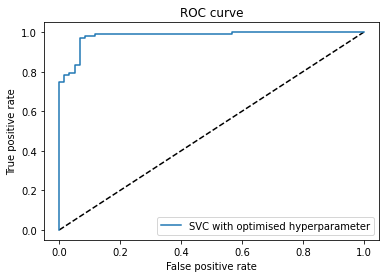

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score

kernels=['linear','poly','rbf']
record = np.zeros(3)
accuracy_score_Records=[]

for kernel in kernels:
  clf = svm.SVC(kernel=kernel, degree=3,C=1)
  scores = cross_val_score(clf, x_train, y_train, cv=5).mean()
  accuracy_score_Records.append(scores)

print(f"'linear','poly','rbf' \n {accuracy_score_Records}")


max_index = np.where(accuracy_score_Records==np.max(accuracy_score_Records))

print(f'the best kernel is {kernels[max_index[0].item()]}')

model_best = svm.SVC(kernel=kernels[max_index[0].item()], degree=3,C=1, probability=True)

clf_best = model_best.fit(x_train, y_train)
y_pred = clf_best.predict(x_test)
y_conf = clf_best.predict_proba(x_test)
svc_matrix = confusion_matrix(y_test, y_pred)
y_train_pred = clf_best.predict(x_train)

print('Training Accurcy = ', metrics.accuracy_score(y_train,y_train_pred).round(3))
print('Testing evalaution metrics:')
print(svc_matrix)
print('Testing Accuracy = ',metrics.accuracy_score(y_test,y_pred).round(3))
print('Recall = ',metrics.recall_score(y_test,y_pred).round(3))
print('Precision = ',metrics.precision_score(y_test,y_pred).round(3))
print('F1 Score = ',metrics.f1_score(y_test,y_pred).round(3))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, np.argmax(y_conf,axis=1))
print('AUC Score = ',auc_score.round(3))

from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label='SVC with optimised hyperparameter')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

<b> Producing a combined ROC graph with best settings for each model

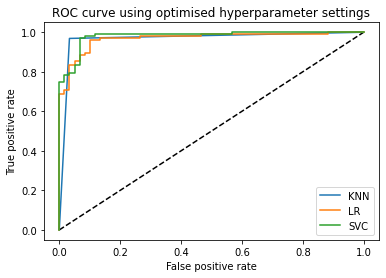

In [ ]:
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve using optimised hyperparameter settings')
plt.legend(loc='best')

<b>Producing confusion maxtrix for the models

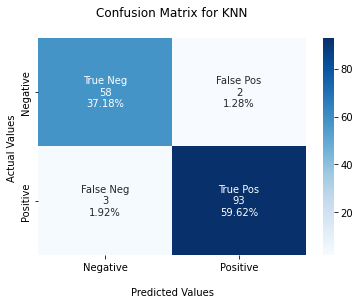

In [ ]:
#Confusion Matrix for KNN
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                knn_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     knn_matrix.flatten()/np.sum(knn_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(knn_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for KNN\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

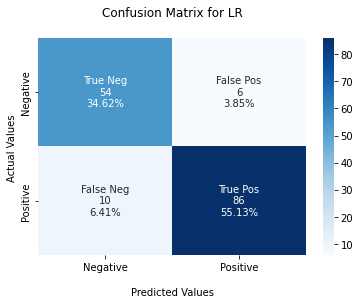

In [ ]:
#Confusion Matrix for LR
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                lr_maxtrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     lr_maxtrix.flatten()/np.sum(lr_maxtrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(lr_maxtrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for LR\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

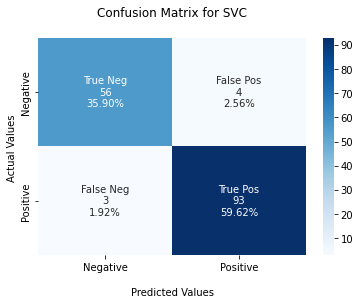

In [ ]:
#Confusion Matrix for KNN
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                svc_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     svc_matrix.flatten()/np.sum(svc_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(svc_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for SVC\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()